**Objective**
Hospital want to understand the patient characteristics associated with heartattack risk to improve preventative measures.

**Data Overview** Dataset has patient related data and factors like age,gender,heart rate,bp which contribute to heart attack risk in the patients. it also has CKMB and Tropnin which are blood markers which can detect the heart damage. its level will increase if the heart is damage.

In [40]:
import pandas as pd
import numpy as np

**Data Reading**

In [41]:
df=pd.read_csv("Medicaldataset.csv")

In [42]:
#shape of the dataset
df.shape

(1319, 9)

In [43]:
# Datatype of each column in dataframe
df.dtypes

,0
Age,int64
Gender,int64
Heart rate,int64
Systolic blood pressure,int64
Diastolic blood pressure,int64
Blood sugar,float64
CK-MB,float64
Troponin,float64
Result,object


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [45]:
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


**Data Cleaning**


In [46]:

# Missing value detection
df.isna().sum()

,0
Age,0
Gender,0
Heart rate,0
Systolic blood pressure,0
Diastolic blood pressure,0
Blood sugar,0
CK-MB,0
Troponin,0
Result,0


#There is no need to deal with data missing as there is no missing data.

In [47]:
#Find % of null values in datasets
print(df.isna().sum()/len(df)*100, '\n')

Age                         0.0
Gender                      0.0
Heart rate                  0.0
Systolic blood pressure     0.0
Diastolic blood pressure    0.0
Blood sugar                 0.0
CK-MB                       0.0
Troponin                    0.0
Result                      0.0
dtype: float64 



In [48]:
#find all the symbol or character in the dataset which should not be part of the column, find for all columns

import string

# Function to find non-standard characters in a column
def find_non_standard_chars(df, column):
    # Define allowed characters (letters, numbers, whitespace, common punctuation)
    allowed_chars = string.ascii_letters + string.digits + string.whitespace + string.punctuation

    # Initialize a set to store unique non-standard characters
    non_standard_chars = set()

    # Iterate through each value in the column
    for value in df[column].dropna(): # Use dropna to skip NaN values
        # Convert value to string (handle potential non-string data types)
        value_str = str(value)
        # Check each character in the string
        for char in value_str:
            if char not in allowed_chars:
                non_standard_chars.add(char)
    return non_standard_chars

# Iterate through all columns in the DataFrame
for col in df.columns:
    non_standard_chars_in_col = find_non_standard_chars(df, col)
    if non_standard_chars_in_col:
        print(f"Non-standard characters found in column '{col}': {non_standard_chars_in_col}")
    else:
        print(f"No non-standard characters found in column '{col}' (or column is empty/contains only standard chars).")

No non-standard characters found in column 'Age' (or column is empty/contains only standard chars).
No non-standard characters found in column 'Gender' (or column is empty/contains only standard chars).
No non-standard characters found in column 'Heart rate' (or column is empty/contains only standard chars).
No non-standard characters found in column 'Systolic blood pressure' (or column is empty/contains only standard chars).
No non-standard characters found in column 'Diastolic blood pressure' (or column is empty/contains only standard chars).
No non-standard characters found in column 'Blood sugar' (or column is empty/contains only standard chars).
No non-standard characters found in column 'CK-MB' (or column is empty/contains only standard chars).
No non-standard characters found in column 'Troponin' (or column is empty/contains only standard chars).
No non-standard characters found in column 'Result' (or column is empty/contains only standard chars).


**Outlier Detection and Handeling**

Generating Histograms split by 'Result'...


<ipython-input-49-73e054122f77>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Result')


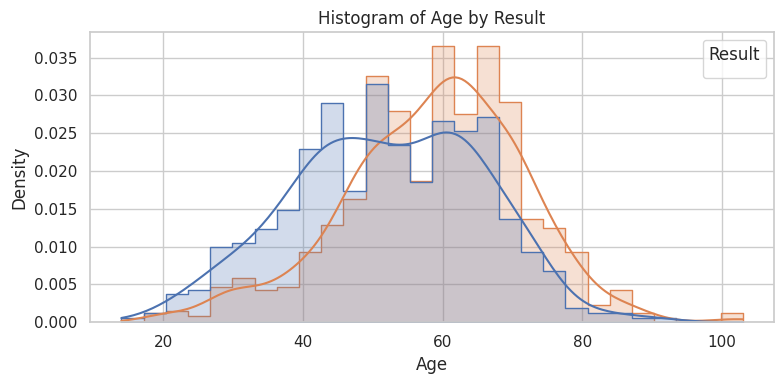

<ipython-input-49-73e054122f77>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Result')


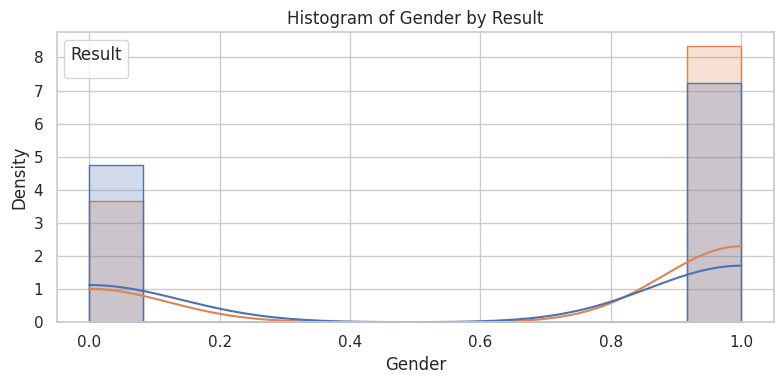

<ipython-input-49-73e054122f77>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Result')


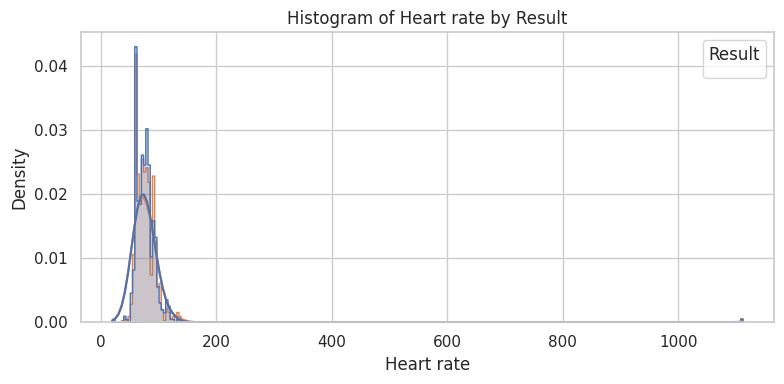

<ipython-input-49-73e054122f77>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Result')


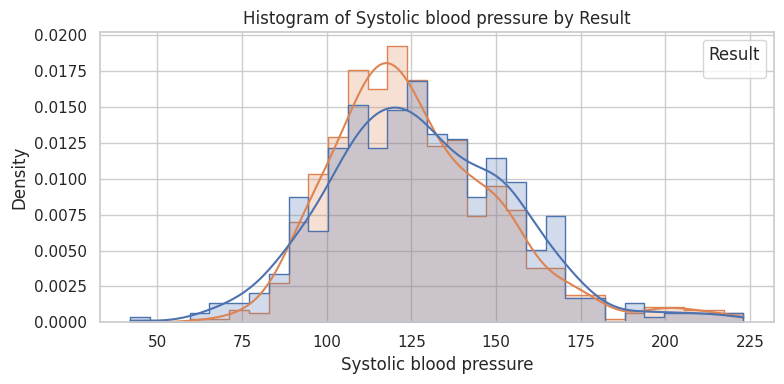

<ipython-input-49-73e054122f77>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Result')


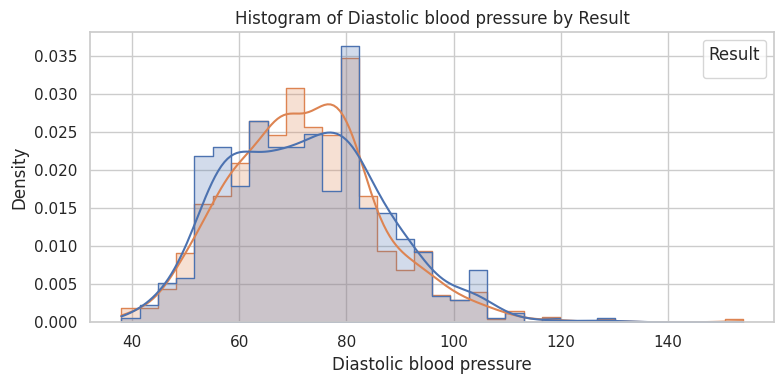

<ipython-input-49-73e054122f77>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Result')


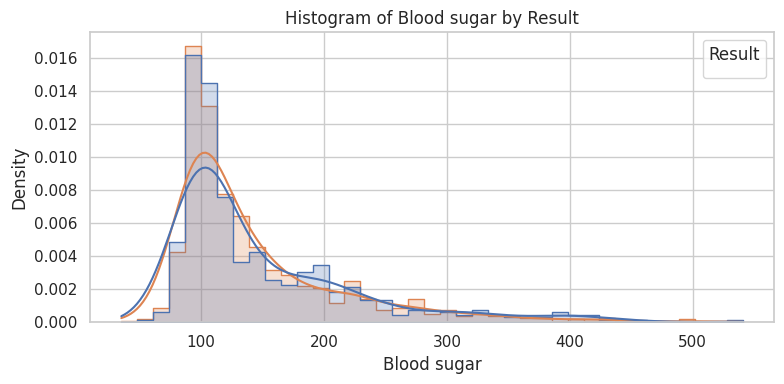

<ipython-input-49-73e054122f77>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Result')


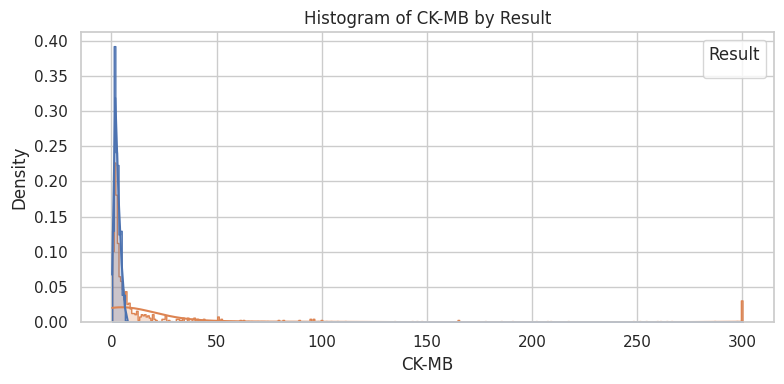

<ipython-input-49-73e054122f77>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Result')


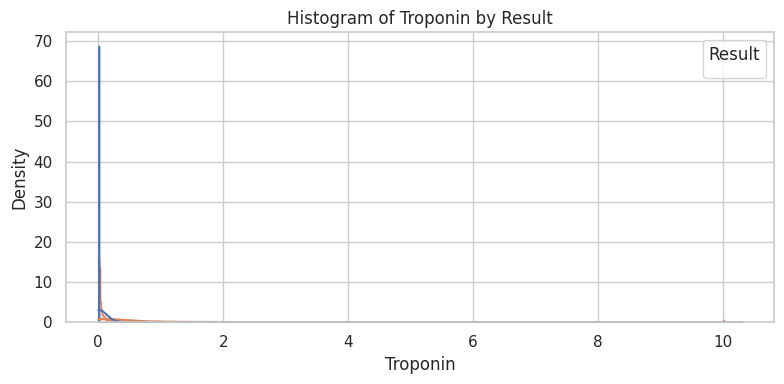

Generating Box Plots split by 'Result'...


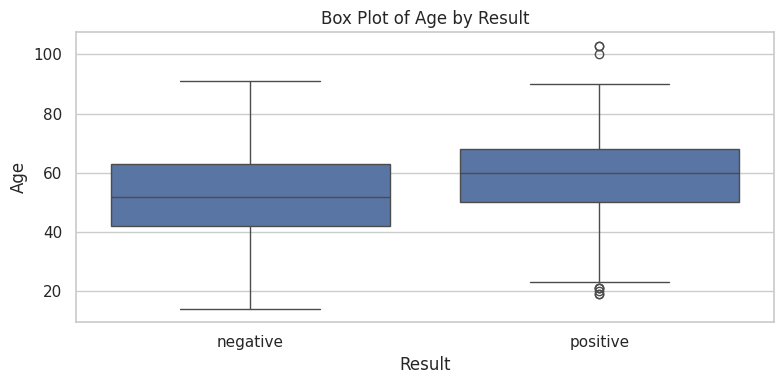

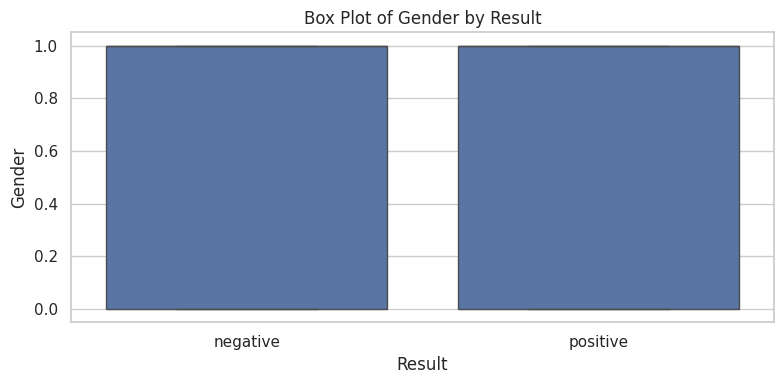

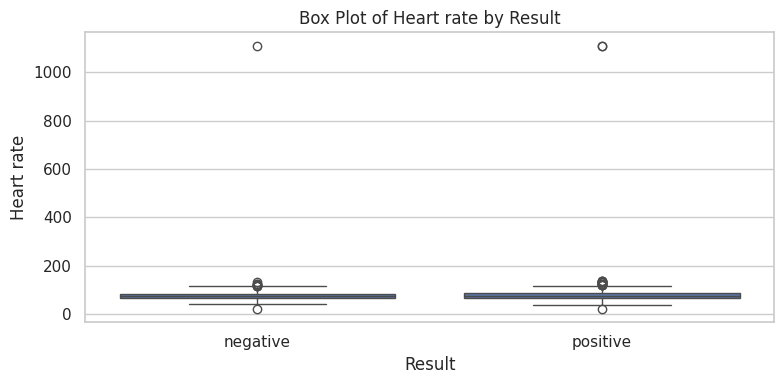

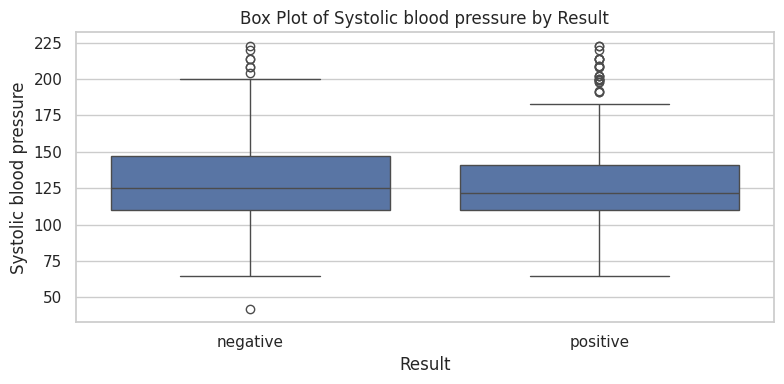

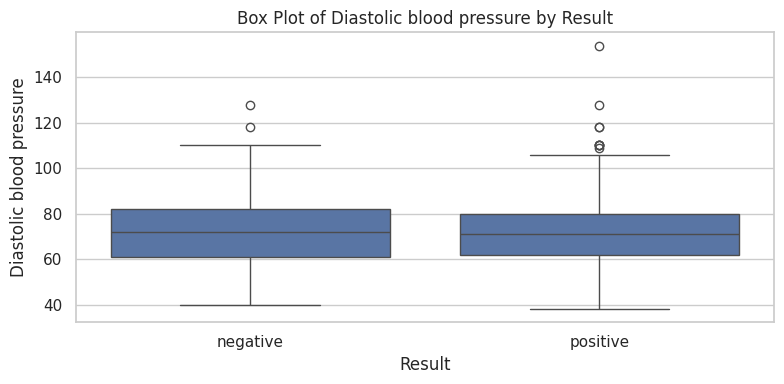

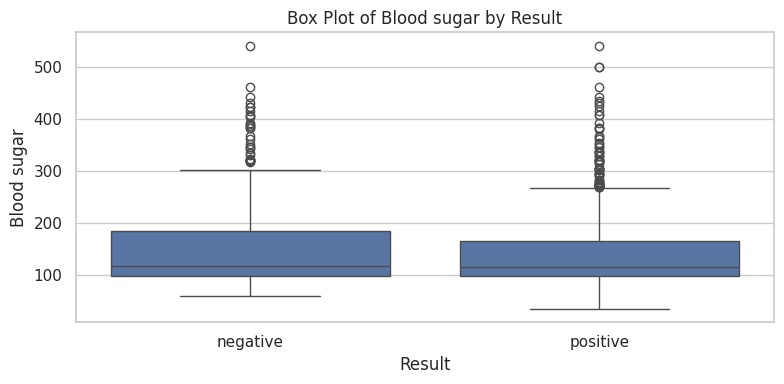

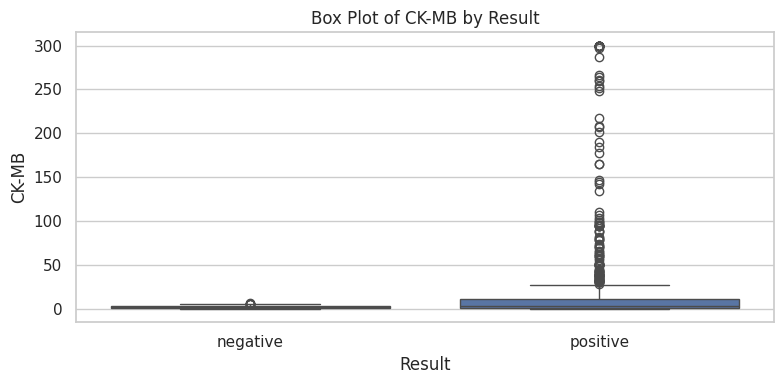

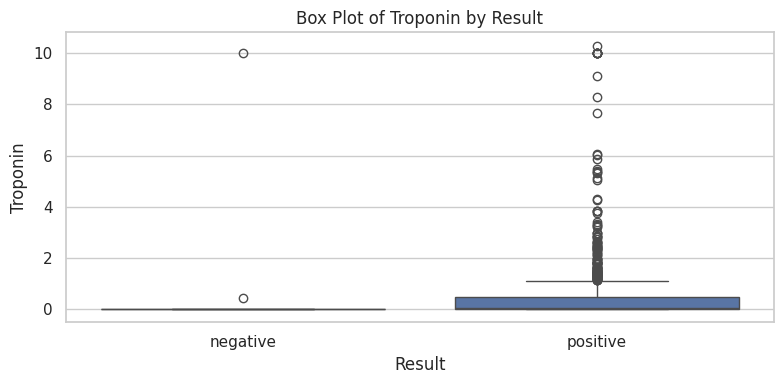

In [49]:
#Visual Representation of the outliers in the dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Set up for better visuals
sns.set(style="whitegrid")
numerical_cols = df.select_dtypes(include='number').columns.drop('Result', errors='ignore')

# Histograms
print("Generating Histograms split by 'Result'...")
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, hue='Result', kde=True, element='step', stat="density", common_norm=False)
    plt.title(f"Histogram of {col} by Result")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend(title='Result')
    plt.tight_layout()
    plt.show()

# Box Plots
print("Generating Box Plots split by 'Result'...")
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='Result', y=col)
    plt.title(f"Box Plot of {col} by Result")
    plt.xlabel("Result")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


In [50]:
print("\n--- Handling Data Quality Issues ---")

# 1. Remove physiologically impossible values
# Define extreme values to remove
invalid_values = {
    'Age': 1111,
    'Heart rate': 1111
}

for col, invalid_val in invalid_values.items():
    before_rows = df.shape[0]
    df = df[df[col] != invalid_val]
    removed = before_rows - df.shape[0]
    print(f"Removed {removed} rows with '{col}' = {invalid_val}.")

# 2. Flag potential capped values (e.g., placeholders like 300 or 10)
# These are not removed, just flagged for awareness/modeling
capped_flags = {
    'CK-MB': 300,
    'Troponin': 10
}

for col, cap_val in capped_flags.items():
    flag_col = f"{col.replace('-', '_')}_Capped_Flag"
    df[flag_col] = (df[col] == cap_val).astype(int)
    print(f"Created '{flag_col}' for {col} values equal to {cap_val}.")

# 3. Gender column notice
print("Note: 'Gender' column uses 0 and 1. Assume a mapping (e.g., 0=Female, 1=Male) and document it.")

# Final output
print(f"\nFinal shape after data quality handling: {df.shape}")
print("First 5 rows of the cleaned DataFrame:")
print(df.head())



--- Handling Data Quality Issues ---
Removed 0 rows with 'Age' = 1111.
Removed 3 rows with 'Heart rate' = 1111.
Created 'CK_MB_Capped_Flag' for CK-MB values equal to 300.
Created 'Troponin_Capped_Flag' for Troponin values equal to 10.
Note: 'Gender' column uses 0 and 1. Assume a mapping (e.g., 0=Female, 1=Male) and document it.

Final shape after data quality handling: (1316, 11)
First 5 rows of the cleaned DataFrame:
   Age  Gender  Heart rate  Systolic blood pressure  Diastolic blood pressure  \
0   64       1          66                      160                        83   
1   21       1          94                       98                        46   
2   55       1          64                      160                        77   
3   64       1          70                      120                        55   
4   55       1          64                      112                        65   

   Blood sugar  CK-MB  Troponin    Result  CK_MB_Capped_Flag  \
0        160.0   1.80     

**Exploratory Data Analysis**

Descriptive Analysis

In [51]:
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,CK_MB_Capped_Flag,Troponin_Capped_Flag
0,64,1,66,160,83,160.0,1.80,0.012,negative,0,0
1,21,1,94,98,46,296.0,6.75,1.060,positive,0,0
2,55,1,64,160,77,270.0,1.99,0.003,negative,0,0
3,64,1,70,120,55,270.0,13.87,0.122,positive,0,0
4,55,1,64,112,65,300.0,1.08,0.003,negative,0,0


In [52]:
df.groupby('Result')['Age'].describe()
df.groupby('Result').describe()


Age                                                      Gender  \
          count       mean        std   min   25%   50%   75%    max  count   
Result                                                                        
negative  508.0  52.133858  13.715257  14.0  42.0  52.0  63.0   91.0  508.0   
positive  808.0  58.769802  12.956374  19.0  50.0  60.0  68.0  103.0  808.0   

                    ... CK_MB_Capped_Flag      Troponin_Capped_Flag            \
              mean  ...               75%  max                count      mean   
Result              ...                                                         
negative  0.604331  ...               0.0  0.0                508.0  0.001969   
positive  0.695545  ...               0.0  1.0                808.0  0.008663   

                                             
               std  min  25%  50%  75%  max  
Result                                       
negative  0.044368  0.0  0.0  0.0  0.0  1.0  
positive  0.092731  0.0  0.0  0.0  0.0  1.0  

[2 rows x 80 columns]

Here CKMB levels are high for the positive patience , this can be a positive factor to predict the heart attack. Positive patient has 23.2 CKMB and Tropnin has 0.57 which high value. patient with CK MB with greater than 23.2 has high chances of heart attack.

Generating Histograms split by 'Result'...


<ipython-input-54-73e054122f77>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Result')


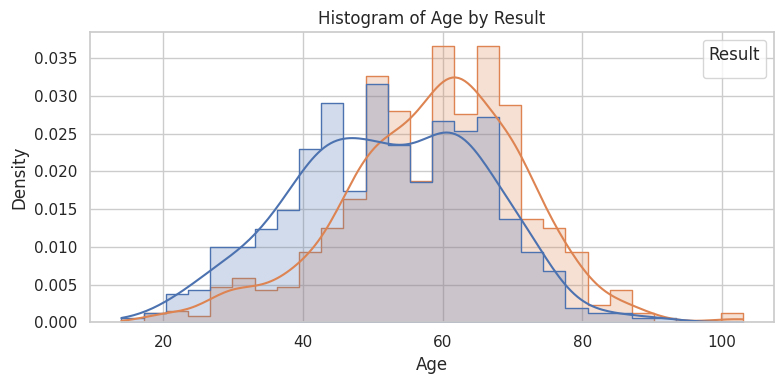

<ipython-input-54-73e054122f77>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Result')


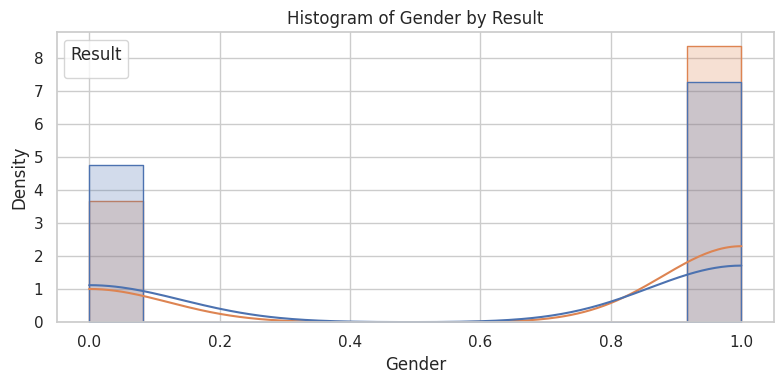

<ipython-input-54-73e054122f77>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Result')


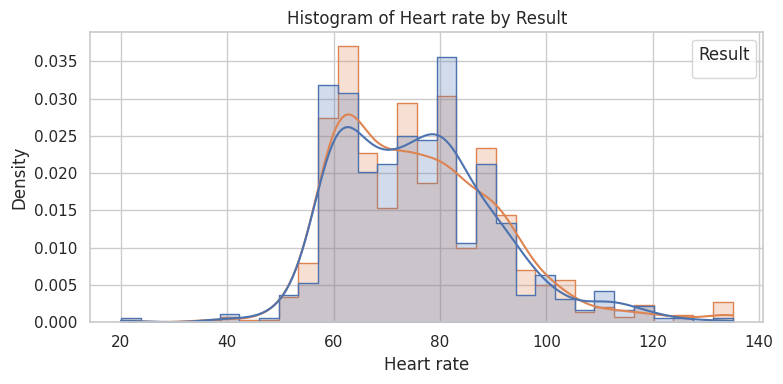

<ipython-input-54-73e054122f77>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Result')


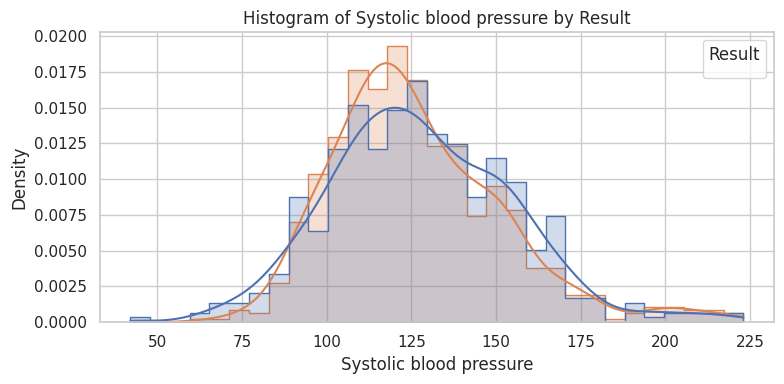

<ipython-input-54-73e054122f77>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Result')


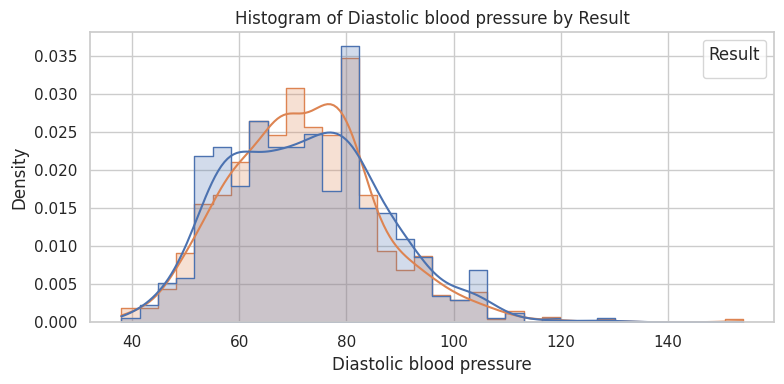

<ipython-input-54-73e054122f77>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Result')


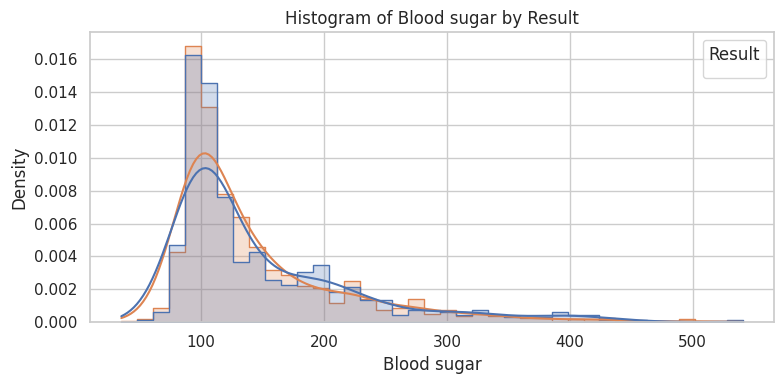

<ipython-input-54-73e054122f77>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Result')


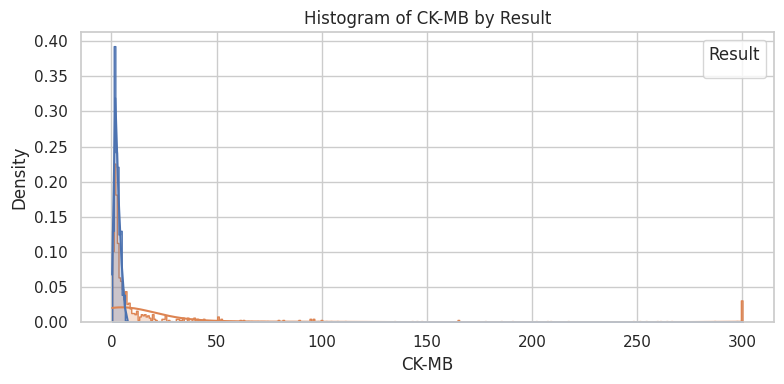

<ipython-input-54-73e054122f77>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Result')


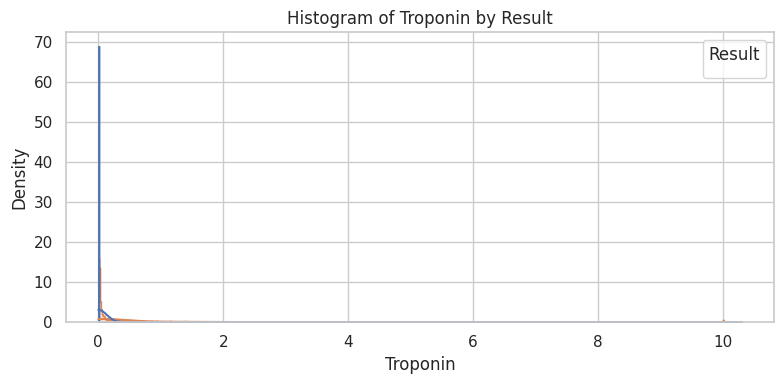

<ipython-input-54-73e054122f77>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Result')


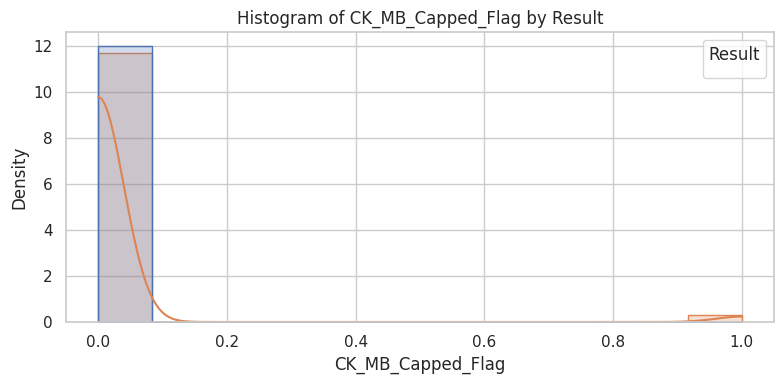

<ipython-input-54-73e054122f77>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Result')


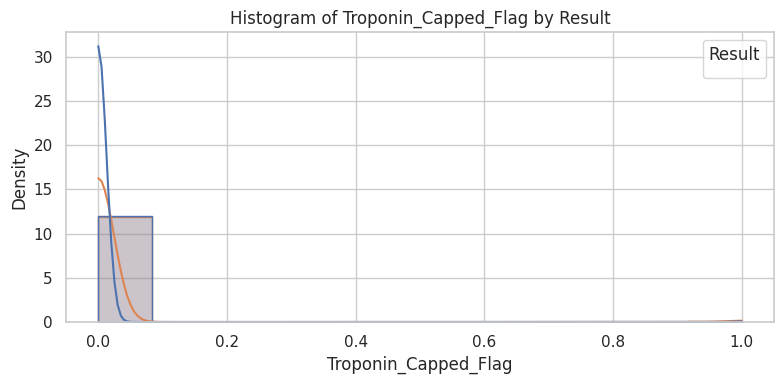

Generating Box Plots split by 'Result'...


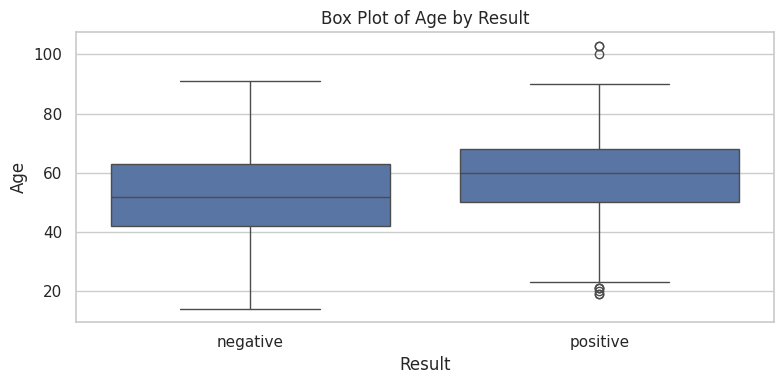

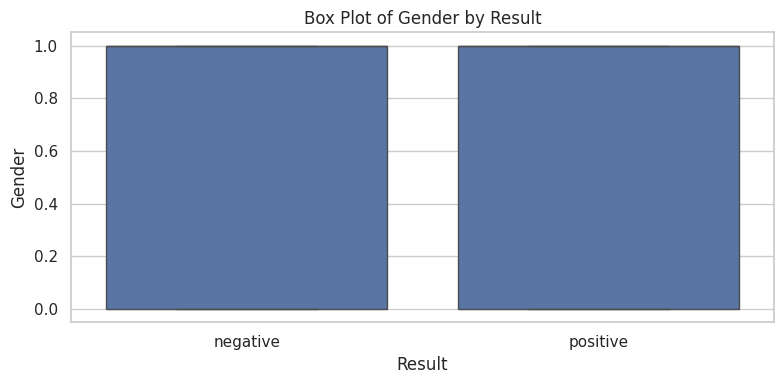

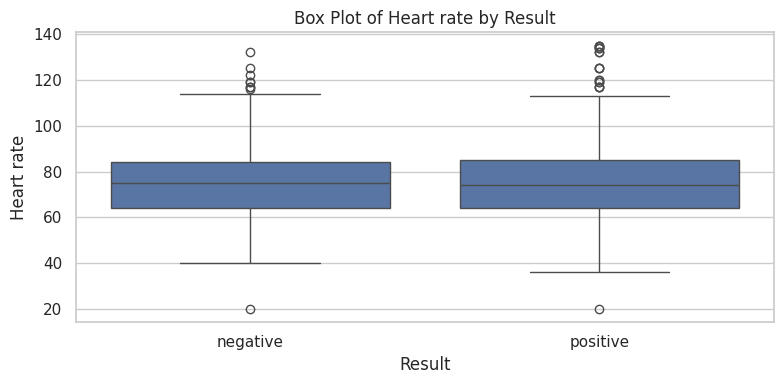

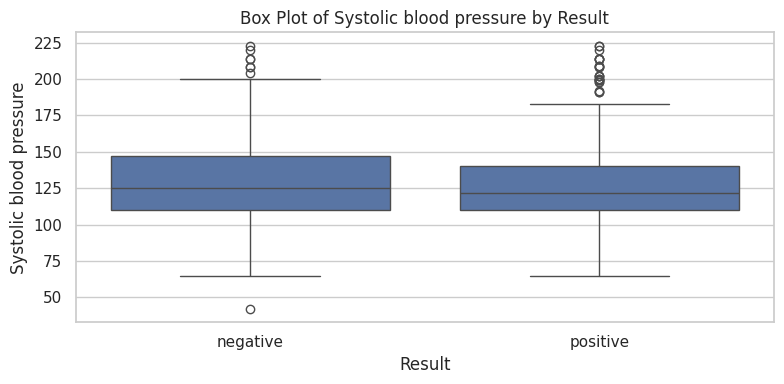

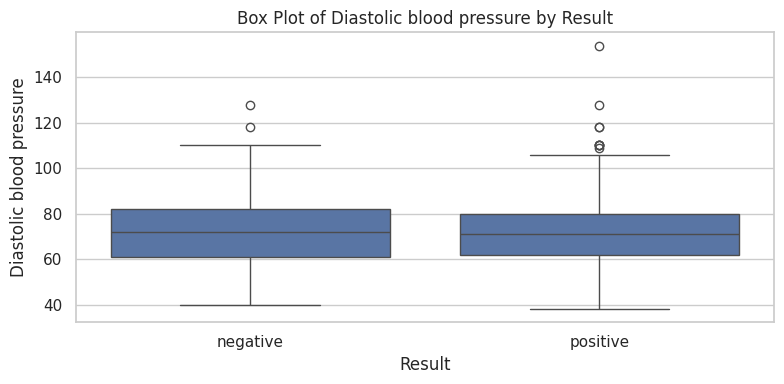

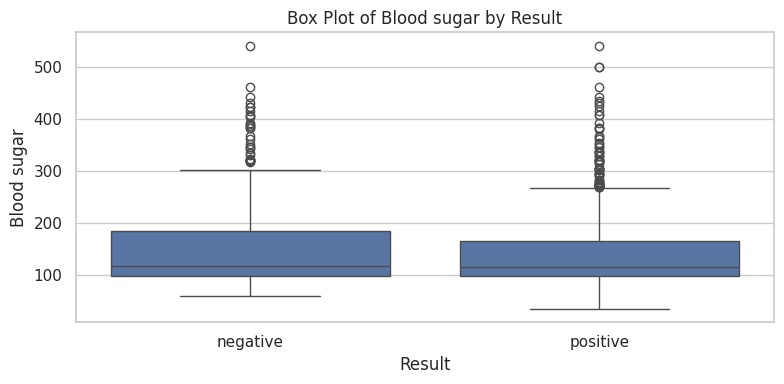

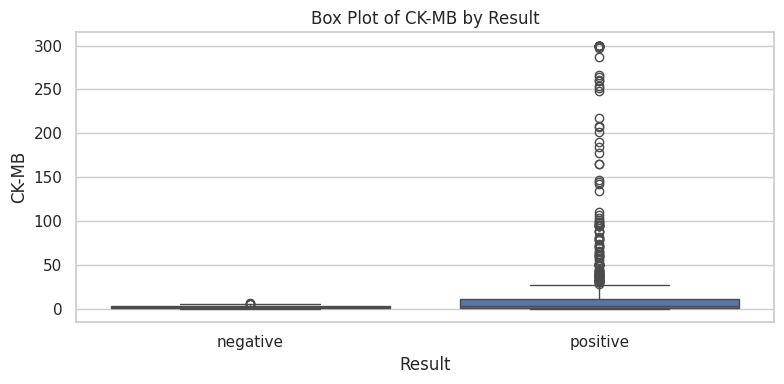

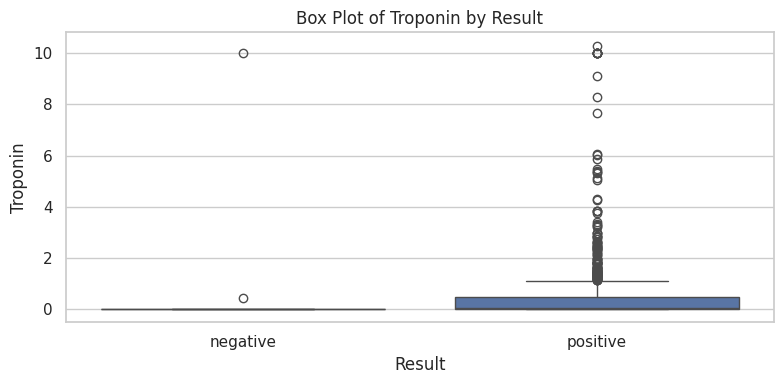

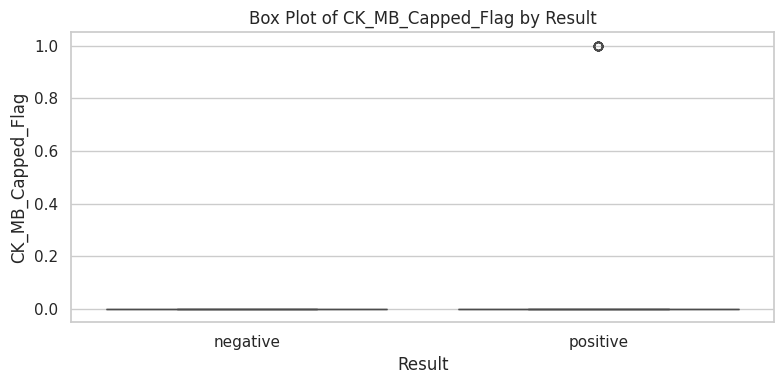

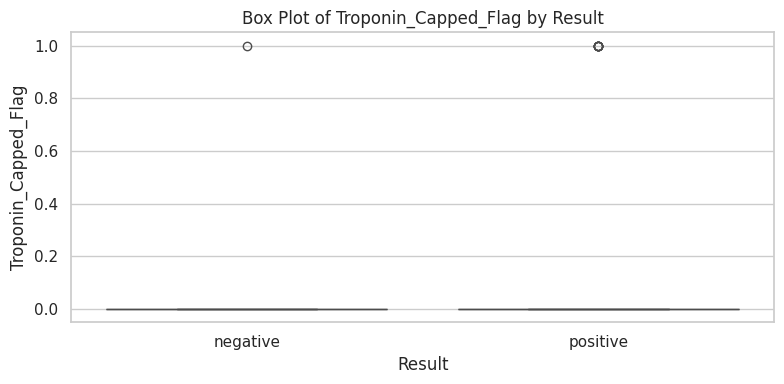

In [54]:
#Visual Representation of the outliers in the dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Set up for better visuals
sns.set(style="whitegrid")
numerical_cols = df.select_dtypes(include='number').columns.drop('Result', errors='ignore')

# Histograms
print("Generating Histograms split by 'Result'...")
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, hue='Result', kde=True, element='step', stat="density", common_norm=False)
    plt.title(f"Histogram of {col} by Result")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend(title='Result')
    plt.tight_layout()
    plt.show()

# Box Plots
print("Generating Box Plots split by 'Result'...")
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='Result', y=col)
    plt.title(f"Box Plot of {col} by Result")
    plt.xlabel("Result")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


Clear difference in CK-MB levels between negative and positive result groups.

The positive group has significantly higher CK-MB values on average and much more variability.

The presence of many extreme outliers suggests that CK-MB could be a strong indicator or biomarker linked to the positive result condition (e.g., myocardial damage, if this is cardiac data).

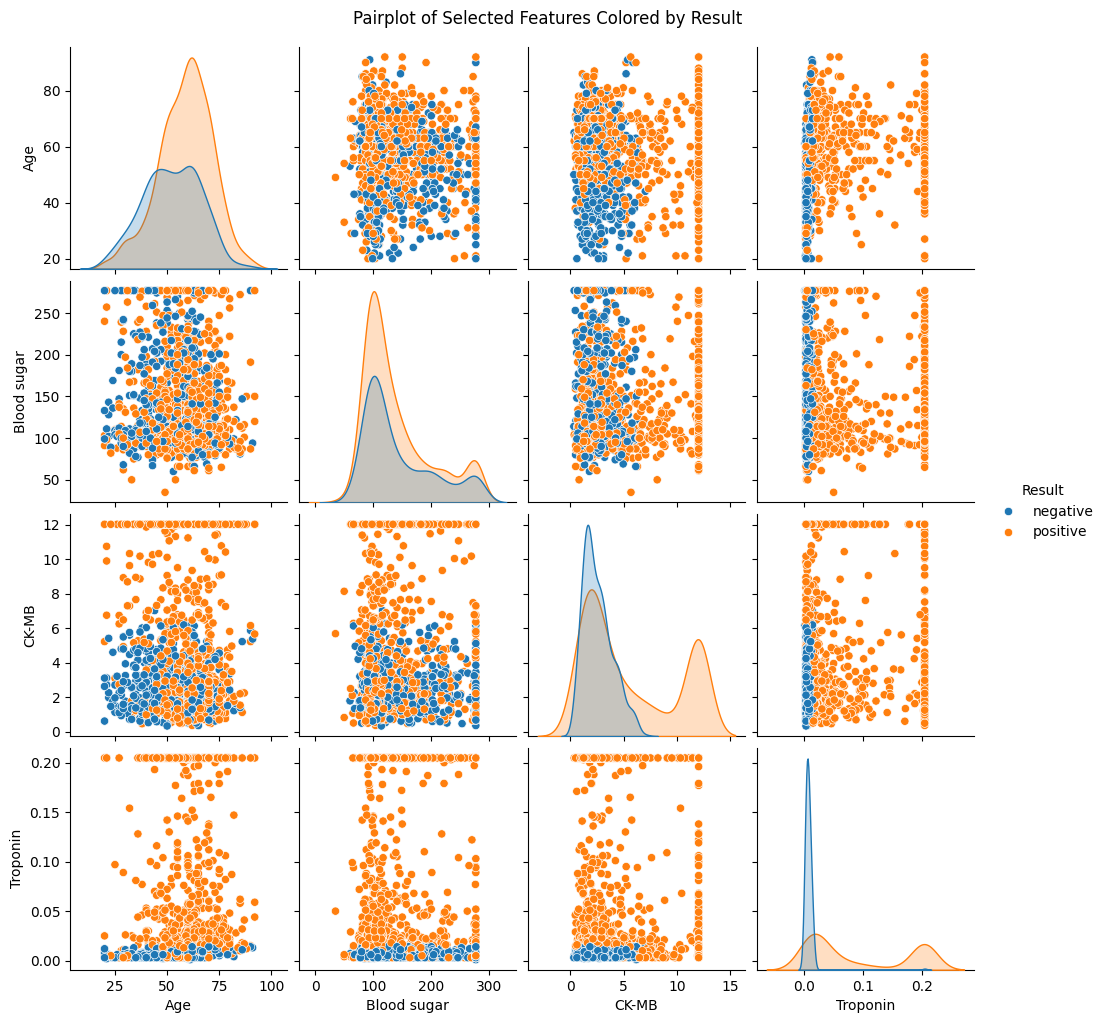

In [55]:

# Select variables of interest
features = ['Age', 'Blood sugar', 'CK-MB', 'Troponin', 'Result']

# Generate pairplot
sns.pairplot(data=df[features], hue='Result', diag_kind='kde')
plt.suptitle('Pairplot of Selected Features Colored by Result', y=1.02)
plt.show()


1.CK-MB and Troponin clearly distinguish between positive and negative cases
For both CK-MB and Troponin, positive cases (orange) dominate the higher value range.

These two features show a strong potential as biomarkers for predicting positive outcomes.

2.CK-MB and Troponin are clustered low for negatives, but spread wide for positives.
3.CK-MB and Troponin are excellent discriminators between positive and negative results
4. Blood Sugar shows weak separation
Blood sugar levels have large overlap between positive and negative cases.Slight tendency of higher values among positives, but not distinct.
5.Blood sugar alone may not be a strong predictor of result.

6. Age has overlapping distribution
There's a slight shift in distribution: positive cases are slightly more frequent in older ages.But still, there's considerable overlap, and young individuals also show positive results.
7.Age contributes some signal but is not a strong standalone predictor.
8.Plot shows some positive relationship: when CK-MB is high, Troponin tends to be high as well (especially for positive cases).

**Corelation between variables**


--- Correlation Matrix Heatmap (All Numerical Features) ---


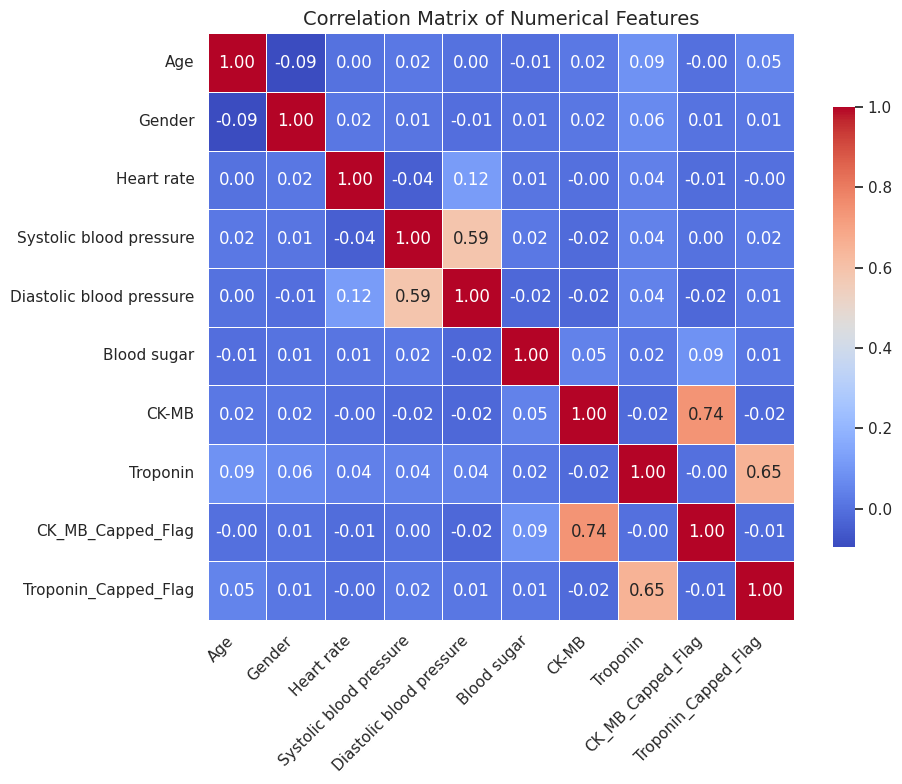

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("\n--- Correlation Matrix Heatmap (All Numerical Features) ---")

# Select only numeric columns (including flags and Result_Encoded)
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.75}
)
plt.title("Correlation Matrix of Numerical Features", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


**Questions to Answer**

In [17]:
#Questions to Answers
#1. what percentage of people has heart attack risk?
#2.how this risk is distributed in male and female?
#3.what is the age group which most patient are falling for heart attack?
#4.what is the avg heart rate,bp,blood suger for positive patient
#5. what is avg CKMB and troponin for positive patient?

In [18]:
#1. what percentage of people has heart attack risk?
result_count=df["Result"].value_counts()
overall=result_count.sum()

positive_percentage = (result_count["positive"] / overall) * 100
negative_percentage = (result_count["negative"] / overall) * 100

print(f"Percentage of positive results: {positive_percentage:.2f}%")
print(f"Percentage of negative results: {negative_percentage:.2f}%")

Percentage of positive results: 61.41%
Percentage of negative results: 38.59%


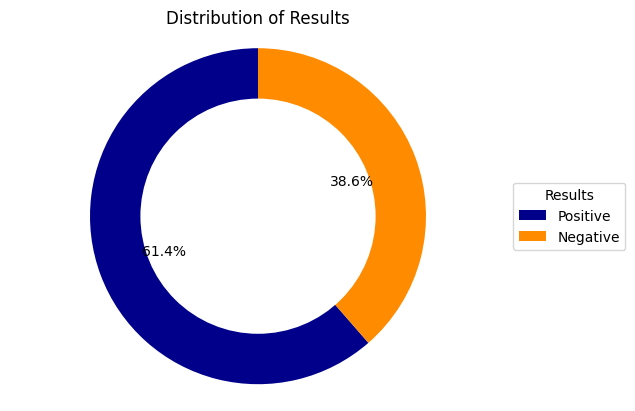

In [19]:
import matplotlib.pyplot as plt

labels = ['Positive', 'Negative']
sizes = [positive_percentage, negative_percentage]
colors = ['darkblue', 'darkorange']

fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie(sizes, colors=colors, autopct='%1.1f%%',
                                   startangle=90)

# Draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Results')
plt.legend(wedges, labels,
           title="Results",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

Percentage of gender in positive cases:
Gender
1    69.506173
0    30.493827
Name: count, dtype: float64


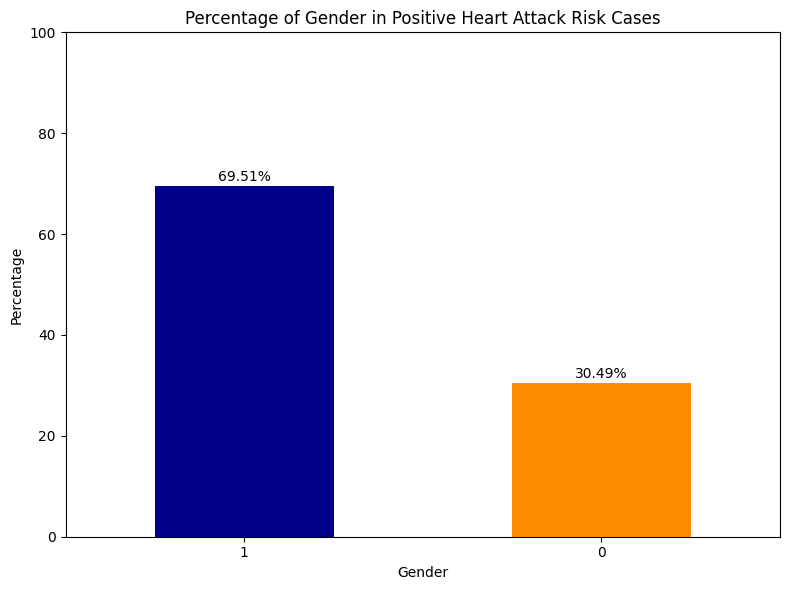

In [20]:
#2.how this risk is distributed in male and female?
# prompt: find percentage of gender in positive_number with visualization
#Assumed here 1 = Male and 0 = Female in the dataset for gender column

# Filter the DataFrame to include only rows where 'Result' is 'positive'
positive_df = df[df['Result'] == 'positive']

# Get the value counts for the 'sex' column within the positive cases
gender_distribution_positive = positive_df['Gender'].value_counts()

# Calculate the percentage distribution
gender_percentage_positive = (gender_distribution_positive / gender_distribution_positive.sum()) * 100

print("Percentage of gender in positive cases:")
print(gender_percentage_positive)

# Create the visualization
plt.figure(figsize=(8, 6))
gender_percentage_positive.plot(kind='bar', color=['darkblue', 'darkorange'])
plt.title('Percentage of Gender in Positive Heart Attack Risk Cases')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0) # Keep x-axis labels horizontal
plt.ylim(0, 100) # Set y-axis limit to 0-100%

# Add the percentage values on top of the bars
for i, percentage in enumerate(gender_percentage_positive):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center')

plt.tight_layout()
plt.show()


**Feature Engineering**

**Modelling**

**Key insights**

**Recommendation**

**Data Dictionary**